In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer

from pprint import pprint
from scipy import stats

In [12]:
#this text is obtained from adult.names file because it contains the information about the data
#the need to do this is because the .data file only contains the samples, not the column names so you have to extract it from the metadata yourself

text = """age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
"""

# Using regex to extract column names
column_names = re.findall(r'([\w-]+):', text)
print(column_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


if you see the .data file, you'll notice that the last column is categorical, but in the .names file it's name is not mentioned bcz it is the target variable. So you have to add one more column in the column_names list to read that column from .data

In [13]:
column_names.append("class")
df = pd.read_csv(r'D:\Sem 5\ML LABS\EDA\adult.data', names=column_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
column_names.append("class")
df = pd.read_csv('adult.data', names=column_names, index_col=False)
df.rename(columns={'sex': 'gender'}, inplace=True)
df.head()

#index_col is set to False because by default first column is made index (in this case, it is age, and we dont want age to be the index)

ValueError: Duplicate names are not allowed.

fnlwgt (final weight) represents the estimated number of people in the population that a particular row of data represents. This "weight" reflects how many individuals share the same characteristics as that specific record


education-num is the numeric representation of educationcolumn, so we can drop education easily.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.drop(columns=['education'], inplace=True)

Checking for missing values

In [ ]:
df.shape

(32561, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   gender          32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  class           32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


we can see that the median and mean of the columns (age, final weight, education-num, and hours-per-week) are almost v close to each other which implies that there are less outliers. However capital-gain and capital-loss have potentially a lot of outliers.

C:\Users\pc\AppData\Local\Temp\ipykernel_11216\4120246372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


([0, 1], [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

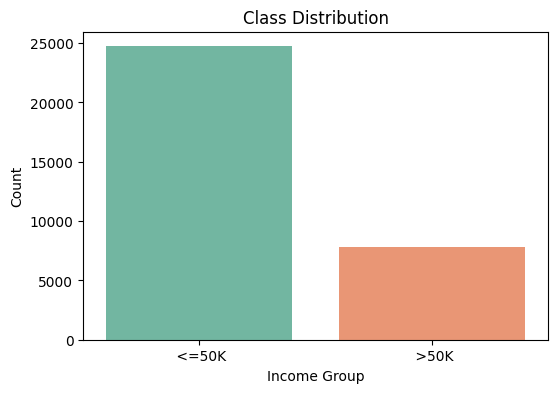

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')

# Add labels
plt.title('Class Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

Checking for duplicates

In [ ]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 24


In [ ]:
df.drop_duplicates(df, inplace=True)

#rechecking
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


selecting categorical and numerical columns

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country', 'class'],
      dtype='object')


Checking for Skew


In [ ]:
#Skewness > 0: Right-skewed (positively skewed).
#Skewness < 0: Left-skewed (negatively skewed).
#Skewness = 0: Symmetrical (normal distribution).
#-0.5 to +0.5 Approximately symmetric

skewness = df[numerical_columns].skew()

# Display the skewness of each numerical column
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
age                0.557663
fnlwgt             1.447703
education-num     -0.309500
capital-gain      11.949403
capital-loss       4.592702
hours-per-week     0.228759
dtype: float64


We can see that fnlwgt, capital-gain and capital-loss are mostly skewed

We have to handle skewness first, BEFORE scaling data.


Handling Skewness

| Transformation          | When to Use                          | Code Example                                          |
|-------------------------|--------------------------------------|-------------------------------------------------------|
| `np.log1p(x)`           | Right skew, x ≥ 0                    | `np.log1p(df['feature'])`                             |
| `np.sqrt(x)`            | Mild right skew, x ≥ 0               | `np.sqrt(df['feature'])`                              |
| `Box-Cox`               | x > 0                                | `PowerTransformer(method='box-cox').fit_transform(x)` |
| `Yeo-Johnson`           | x can be negative or 0               | `PowerTransformer(method='yeo-johnson').fit_transform(x)` |
| `QuantileTransformer`   | Very high skew or non-parametric use | `QuantileTransformer(output_distribution='normal').fit_transform(x)` |


In [ ]:
pt = PowerTransformer(method='yeo-johnson')
df[['fnlwgt', 'capital-gain', 'capital-loss']] = pt.fit_transform(df[['fnlwgt', 'capital-gain', 'capital-loss']])
skewness = df[['fnlwgt', 'capital-gain', 'capital-loss']].skew()

# Display the skewness of each numerical column
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
fnlwgt          0.016948
capital-gain    3.014828
capital-loss    4.297754
dtype: float64


Checking the distribution of numerical columns

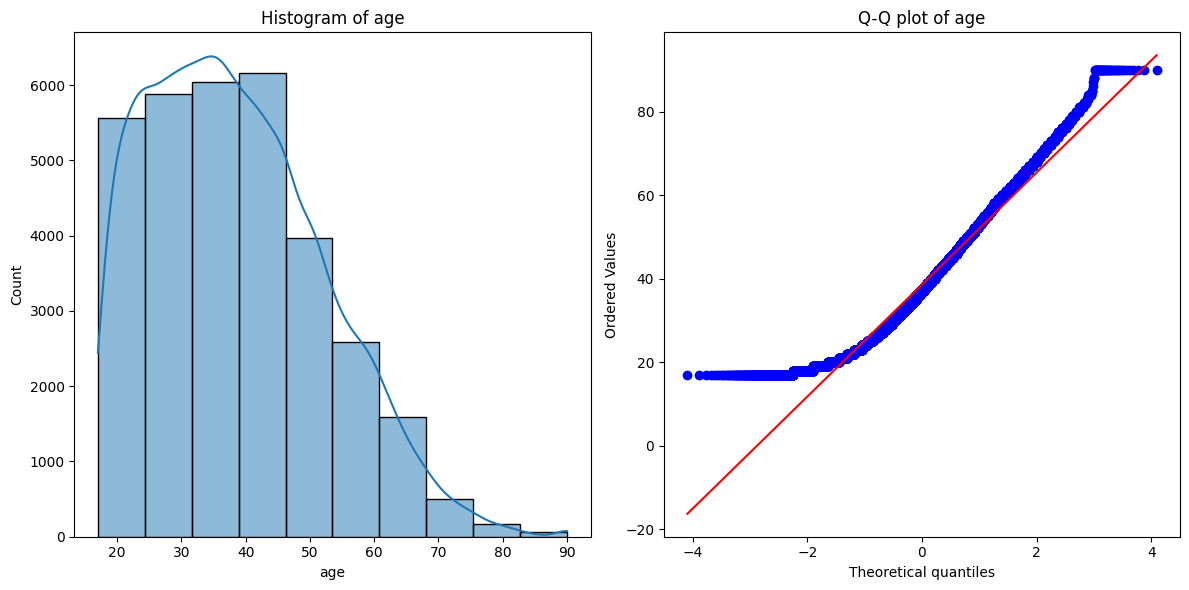

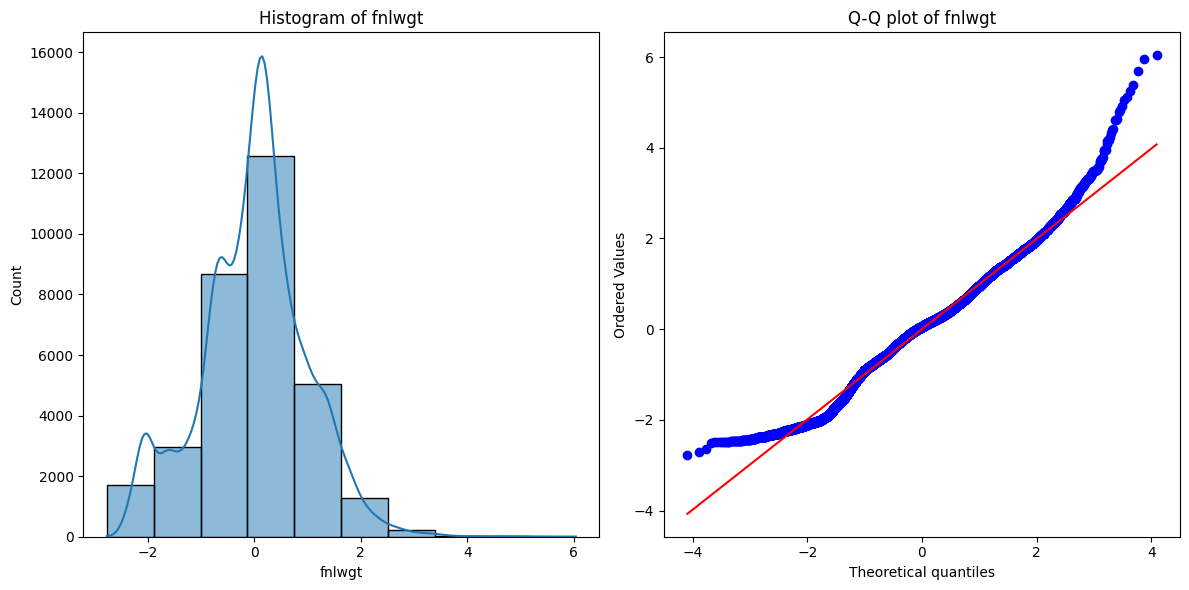

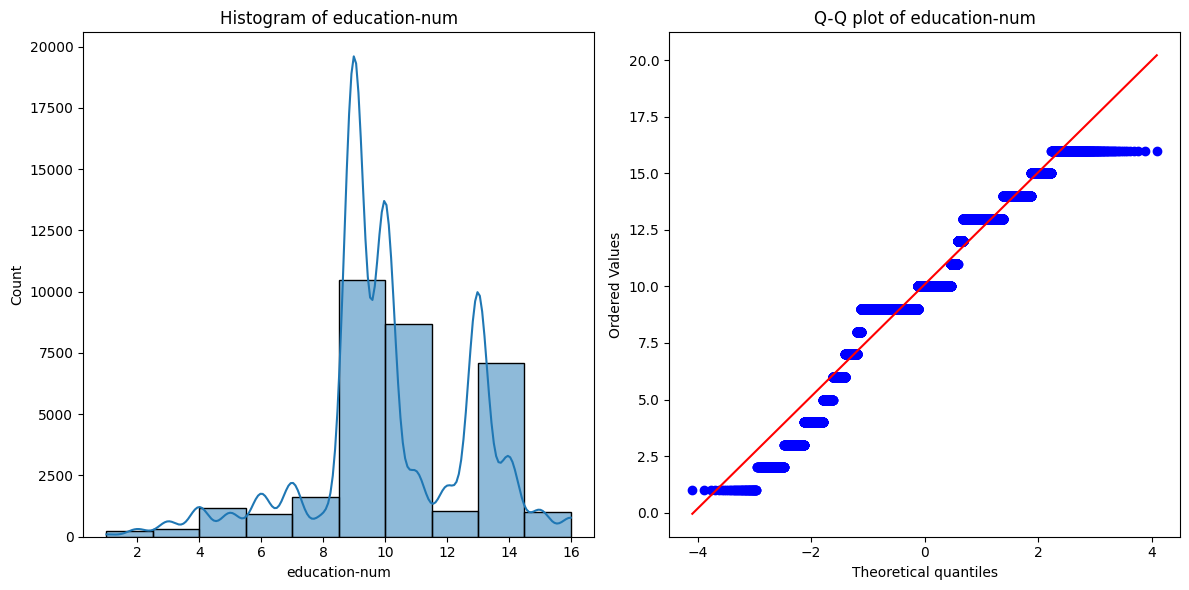

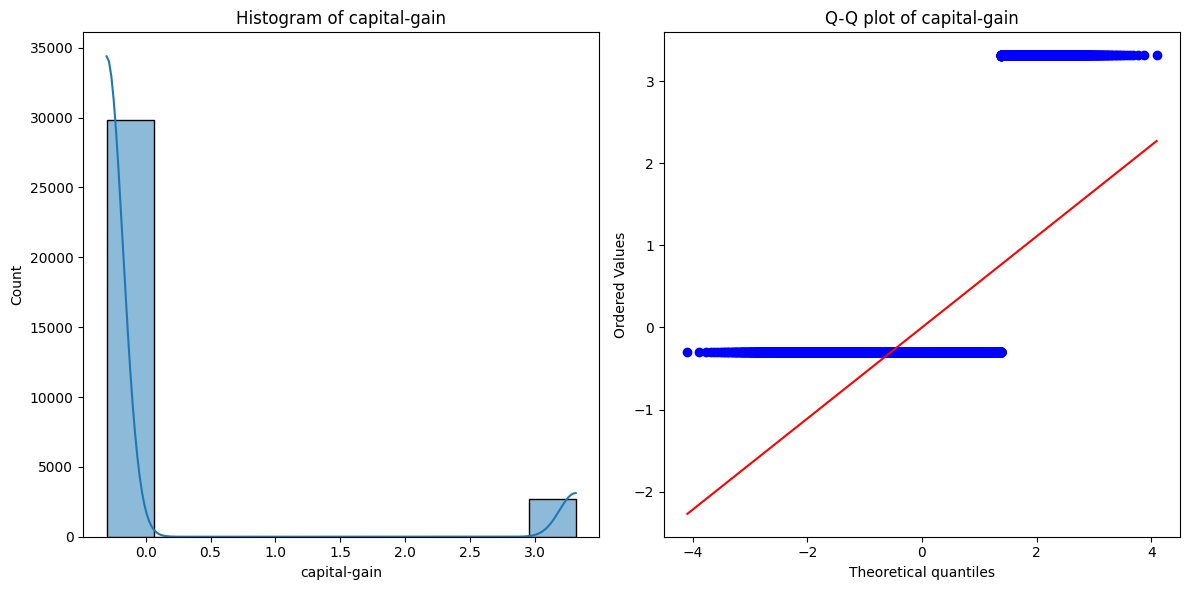

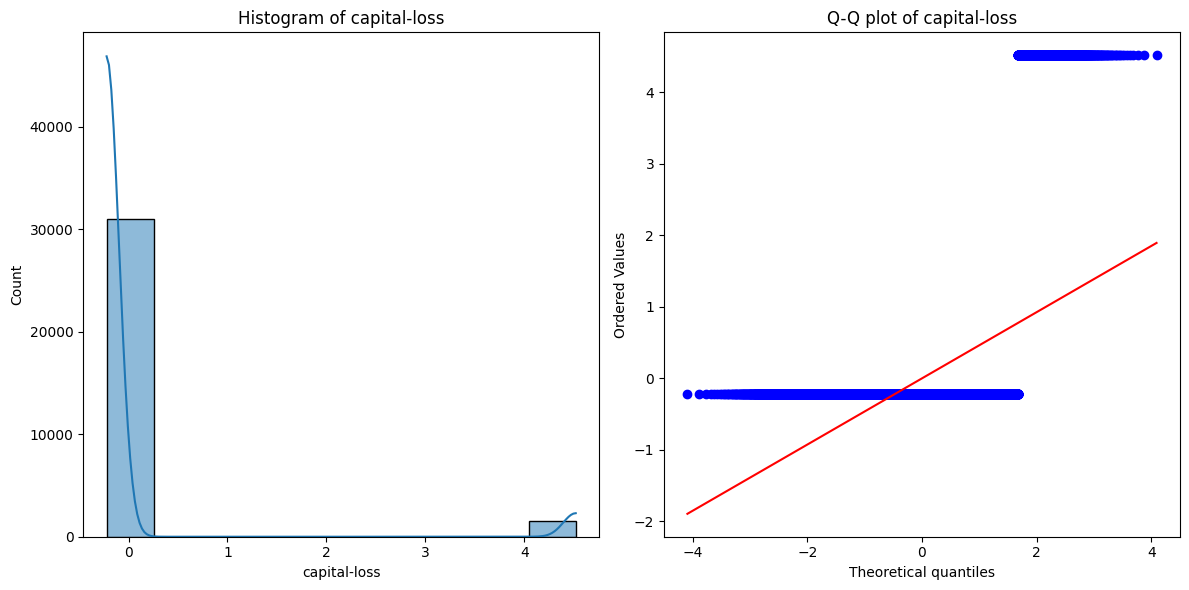

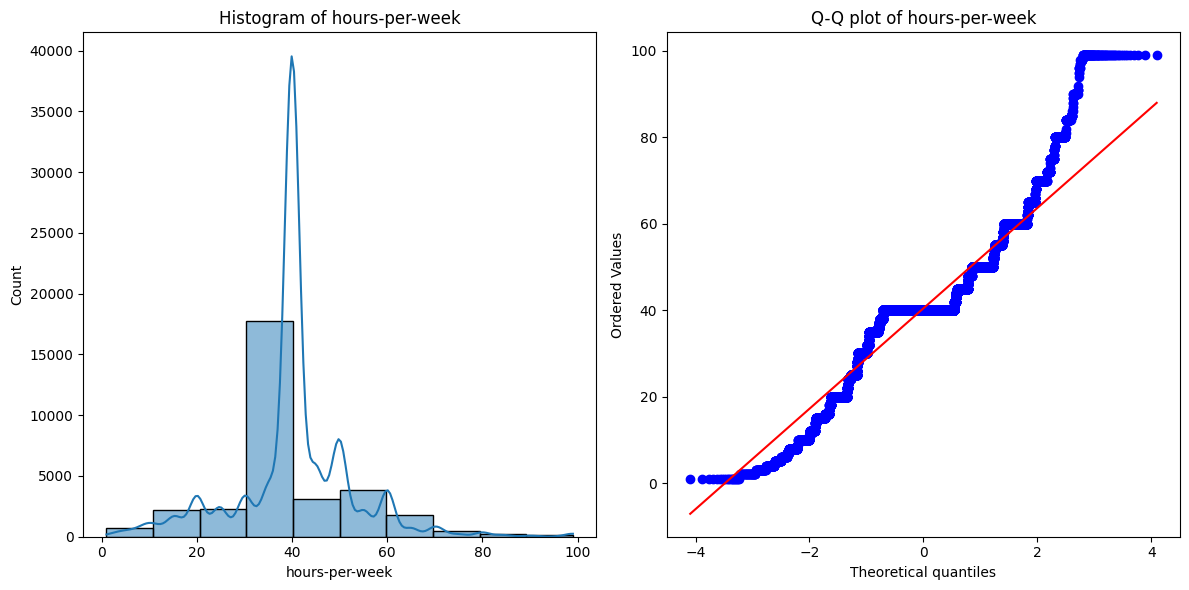

In [ ]:
#checking if the columns follow normal distribution
for col in numerical_columns:
    # Histogram (If the histogram looks symmetric and bell-shaped, it’s a sign that the data might follow a normal distribution)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Histogram of {col}')
    
    # Q-Q plot (If the points fall roughly along a straight line, the data might be normally distributed.)
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')
    
    plt.tight_layout()
    plt.show()

Outliers Detection

Since the features do not follow normal distribution, we can not use z-score for outlier detection. IQR method is preferable when data does not follow normal distribution.

In [18]:
#If the percentage of outliers is low (e.g., <5%): It is generally acceptable to leave the outliers as they are

def detect_outliers_IQR(num_col):
    print(f"Num Cols :\n{num_col}")
    
    outliers_count = {}
    total_count = len(num_col)
    
    for col in num_col:
        print(f"Col : \n {col} \n")
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers and count them
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outliers_count[col] = len(outlier_indices)  # Store the count of outliers
        
        # Calculate the percentage of outliers
        outlier_percentage = (len(outlier_indices) / total_count) * 100
        outliers_count[col] = {
            'count': len(outlier_indices),
            'percentage': outlier_percentage
        }
    
    return outliers_count

numerical_columns = df.select_dtypes(include=['number']).columns
# Get number of outliers and percentage of outliers for each numerical column
outliers_count = detect_outliers_IQR(df[numerical_columns])

# Display the number of outliers and their percentage in each column
print("Outliers and their percentages:")
for col, count_info in outliers_count.items():
    print(f"{col}: {count_info['count']} outlier(s), {count_info['percentage']:.2f}%")


Num Cols :
       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]
Col : 
 age 

Col : 
 fnlwg

Capital-gain and hours-per-week have significant outliers. Now we will cross-check it with Box plots and Scatter plot

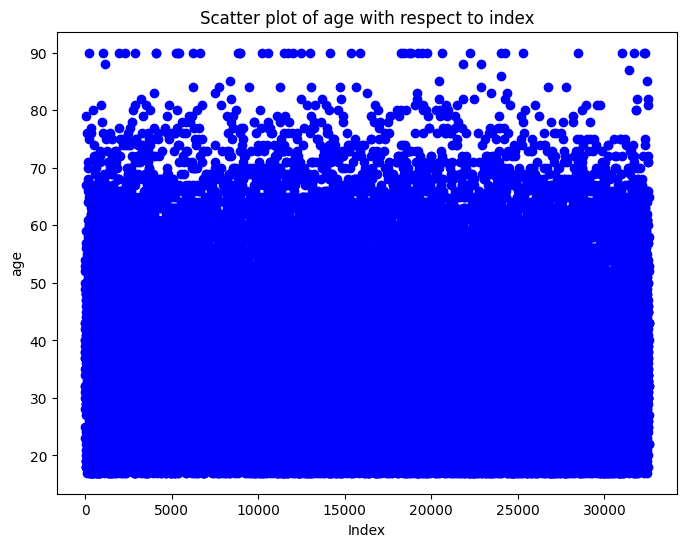

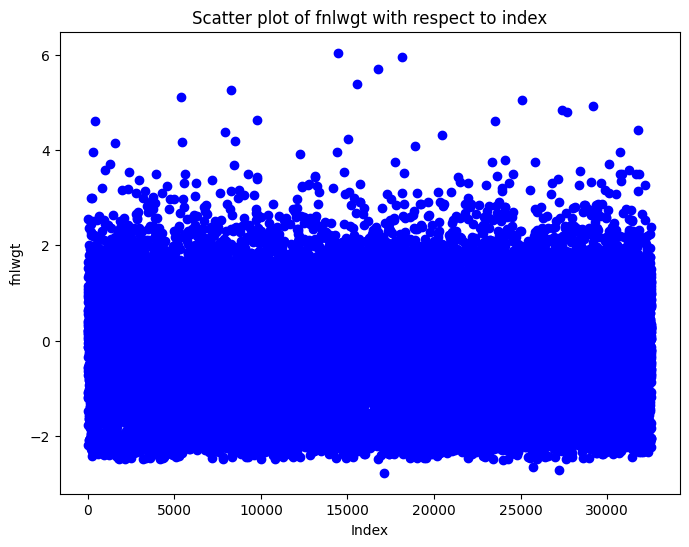

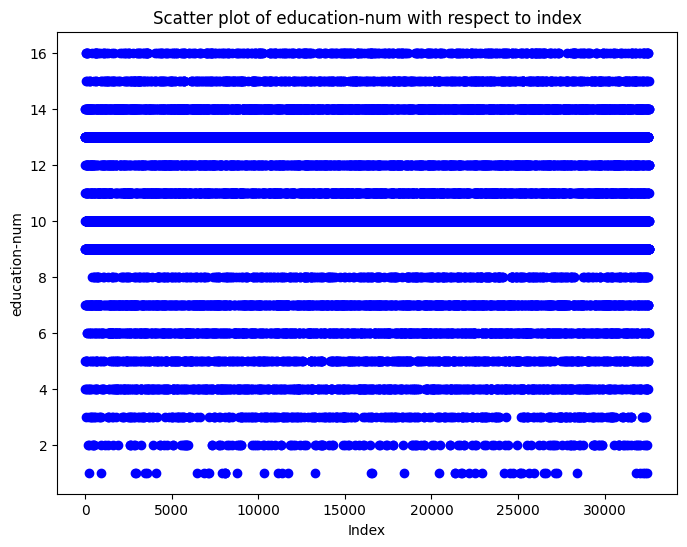

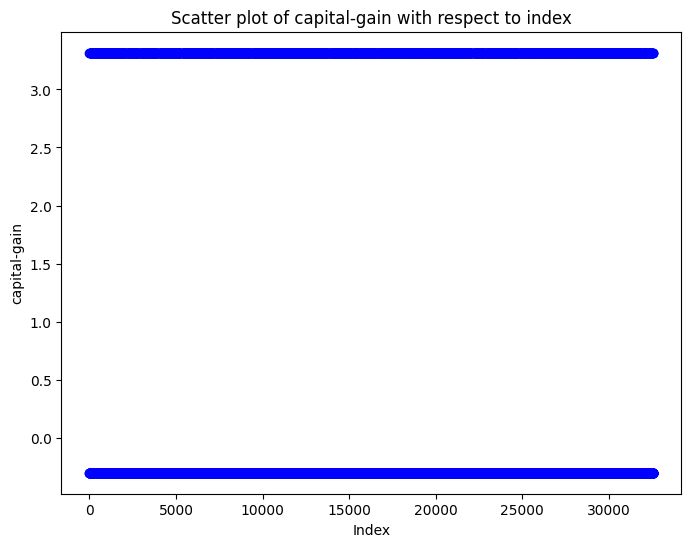

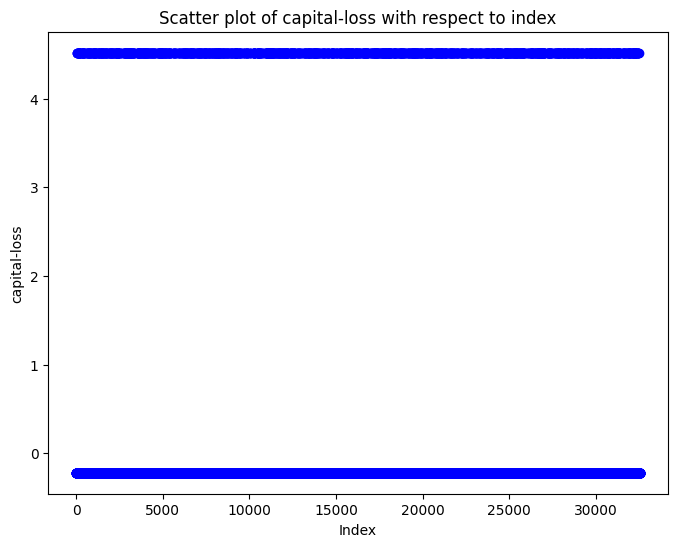

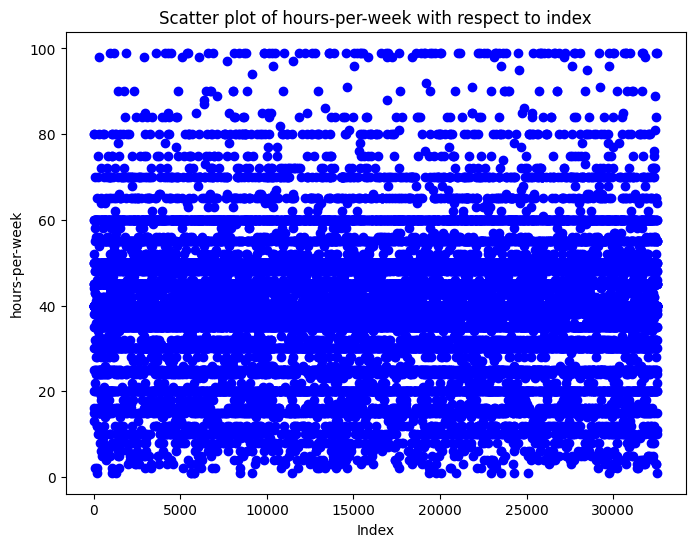

In [ ]:
for num_col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[num_col], color='blue', label=num_col)
    plt.title(f'Scatter plot of {num_col} with respect to index')
    plt.xlabel('Index')
    plt.ylabel(num_col)
    plt.show()

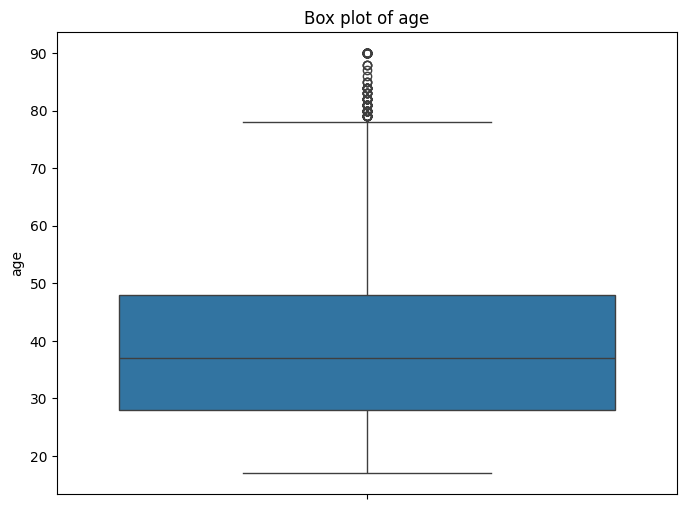

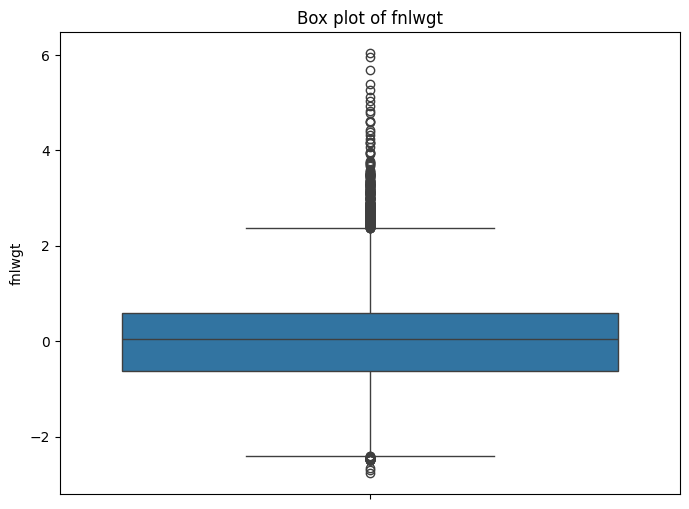

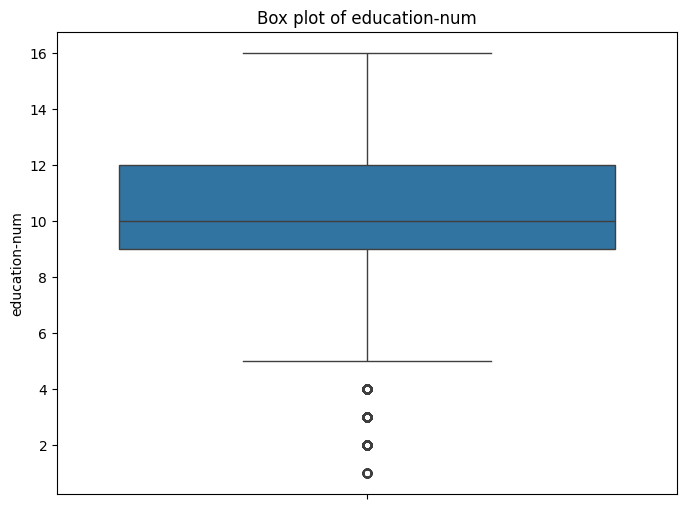

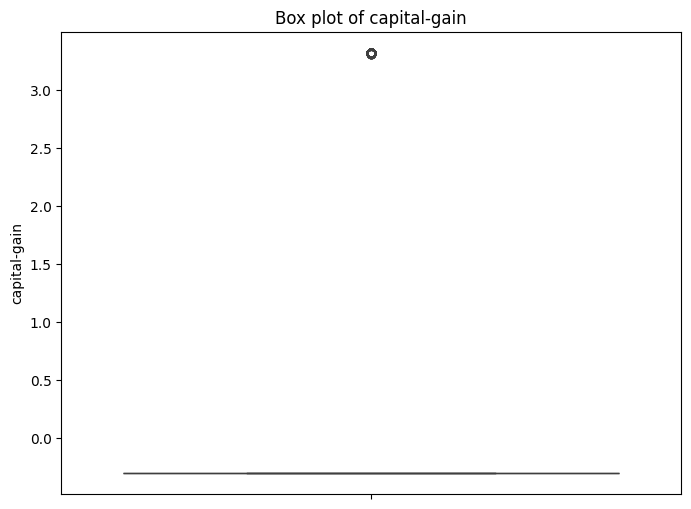

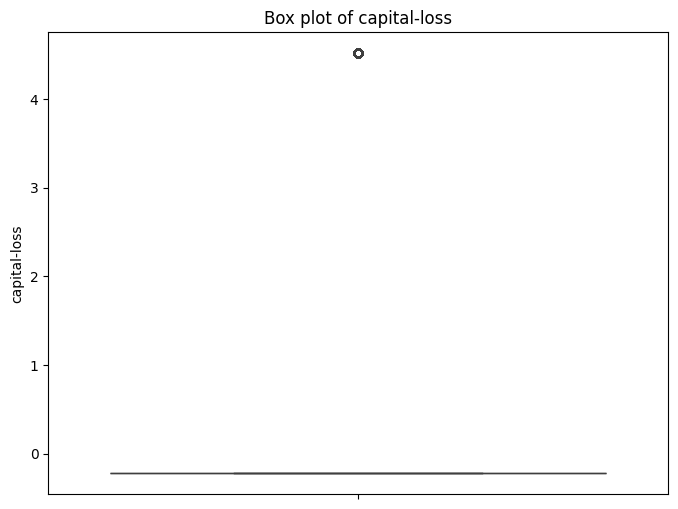

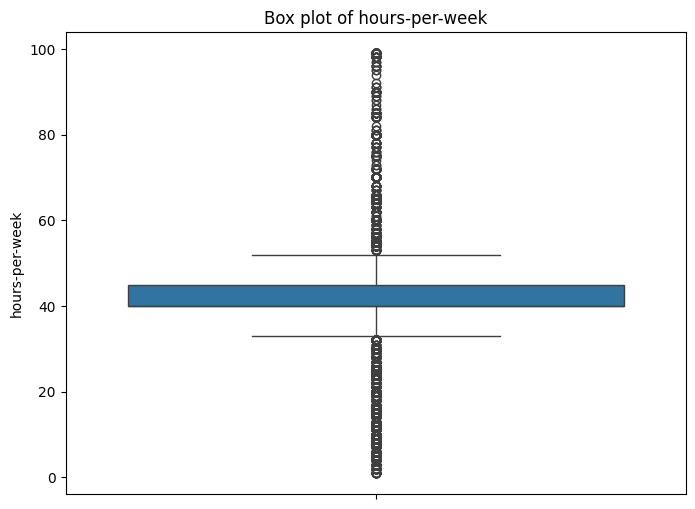

In [ ]:
# Plot boxplot to visualize outliers
for num_col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[num_col])
    plt.title(f'Box plot of {num_col}')
    plt.show()

Feature Scaling On Numerical Columns

In [ ]:
scalar=MinMaxScaler()
df[numerical_columns] = scalar.fit_transform(df[numerical_columns])
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.301370,State-gov,0.180112,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.999971,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.190386,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.359467,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.378069,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.466403,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K


Feature Encoding On Categorical Columns

In [ ]:
categorical_dict = {col: df[col].unique().tolist() for col in categorical_columns}
pprint(categorical_dict)

{'class': [' <=50K', ' >50K'],
 'gender': [' Male', ' Female'],
 'marital-status': [' Never-married',
                    ' Married-civ-spouse',
                    ' Divorced',
                    ' Married-spouse-absent',
                    ' Separated',
                    ' Married-AF-spouse',
                    ' Widowed'],
 'native-country': [' United-States',
                    ' Cuba',
                    ' Jamaica',
                    ' India',
                    ' ?',
                    ' Mexico',
                    ' South',
                    ' Puerto-Rico',
                    ' Honduras',
                    ' England',
                    ' Canada',
                    ' Germany',
                    ' Iran',
                    ' Philippines',
                    ' Italy',
                    ' Poland',
                    ' Columbia',
                    ' Cambodia',
                    ' Thailand',
                    ' Ecuador',
                    ' Laos',
 

In [ ]:
#removing whitespaces from the columns and making them consistent
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip())
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())

In [ ]:
categorical_dict = {col: df[col].unique().tolist() for col in categorical_columns}
pprint(categorical_dict)

{'class': ['<=50k', '>50k'],
 'gender': ['male', 'female'],
 'marital-status': ['never-married',
                    'married-civ-spouse',
                    'divorced',
                    'married-spouse-absent',
                    'separated',
                    'married-af-spouse',
                    'widowed'],
 'native-country': ['united-states',
                    'cuba',
                    'jamaica',
                    'india',
                    '?',
                    'mexico',
                    'south',
                    'puerto-rico',
                    'honduras',
                    'england',
                    'canada',
                    'germany',
                    'iran',
                    'philippines',
                    'italy',
                    'poland',
                    'columbia',
                    'cambodia',
                    'thailand',
                    'ecuador',
                    'laos',
                    'taiwan',
   

In [ ]:
#note in the above cell's output that there are ' ?' (notice whitespaces too) in some columns
df['native-country'] = df['native-country'].replace('?',df['native-country'].mode()[0])
df['occupation'] = df['occupation'].replace('?',df['occupation'].mode()[0])
df['workclass'] = df['workclass'].replace('?',df['workclass'].mode()[0])

In [ ]:
#consolidating values
df['marital-status'] = df['marital-status'].replace({
    'married-civ-spouse': 'married', 'married-af-spouse': 'married','married-spouse-absent': 'unmarried',
    'never-married': 'unmarried','divorced': 'unmarried','separated': 'unmarried','widowed': 'unmarried'
})

In [ ]:
# df['education'] = df['education'].replace({
#     # Primary (basic education)
#     'preschool': 'primary',
#     '1st-4th': 'primary',
#     '5th-6th': 'primary',
#     '7th-8th': 'primary',

#     # Secondary (before HS completion)
#     '9th': 'secondary',
#     '10th': 'secondary',
#     '11th': 'secondary',
#     '12th': 'secondary',

#     # High School complete
#     'hs-grad': 'high_school',

#     # Some college, no degree
#     'some-college': 'high_school',
#     'assoc-acdm': 'high_school',
#     'assoc-voc': 'high_school',

#     # Tertiary (Bachelor and above)
#     'bachelors': 'tertiary',
#     'masters': 'tertiary',
#     'doctorate': 'tertiary',
#     'prof-school': 'tertiary'
# })

In [ ]:
df['native-country'] = df['native-country'].apply(
    lambda x: 'united-states' if x == 'united-states' else 'other'
)

In [ ]:
df['workclass'] = df['workclass'].replace({
    'private': 'private',
    'self-emp-not-inc': 'self-employed',
    'self-emp-inc': 'self-employed',
    'federal-gov': 'government',
    'state-gov': 'government',
    'local-gov': 'government',
    'without-pay': 'unemployed/other',
    'never-worked': 'unemployed/other',
})

In [ ]:
df['occupation'] = df['occupation'].replace({
    # Blue-Collar
    'machine-op-inspct': 'blue-collar',
    'craft-repair': 'blue-collar',
    'transport-moving': 'blue-collar',
    'handlers-cleaners': 'blue-collar',
    'priv-house-serv': 'blue-collar',
    'farming-fishing': 'blue-collar',
    
    # White-Collar
    'adm-clerical': 'white-collar',
    'sales': 'white-collar',
    'exec-managerial': 'white-collar',
    'tech-support': 'white-collar',

    # Service
    'protective-serv': 'service',
    'other-service': 'service',

    # Professional
    'prof-specialty': 'professional',

    # Military
    'armed-forces': 'military',

    # Missing/Other
    '?': 'unknown'
})


📊 CROSSTAB: Workclass vs Class
class             <=50k  >50k
workclass                    
government         69.2  30.8
private            79.0  21.0
self-employed      63.2  36.8
unemployed/other  100.0   0.0


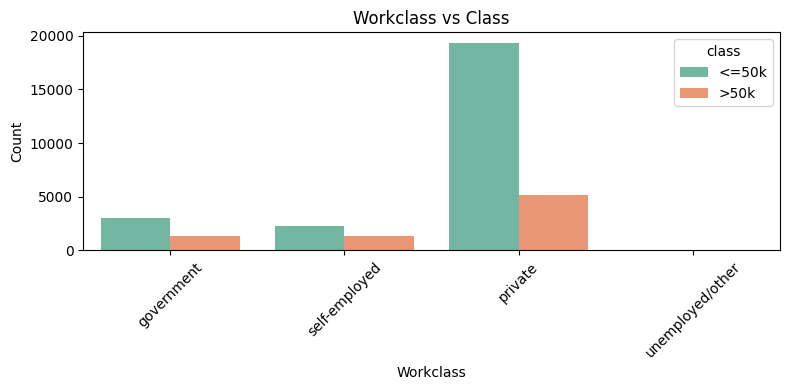


📊 CROSSTAB: Marital-Status vs Class
class           <=50k  >50k
marital-status             
married          55.3  44.7
unmarried        93.5   6.5


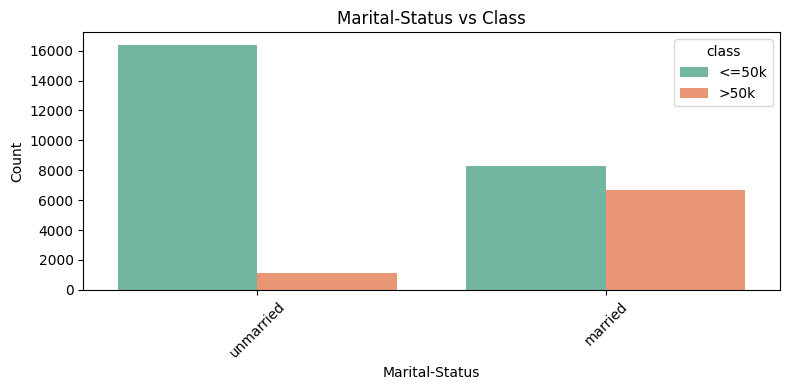


📊 CROSSTAB: Occupation vs Class
class         <=50k  >50k
occupation               
blue-collar    83.3  16.7
military       88.9  11.1
professional   65.7  34.3
service        91.2   8.8
white-collar   69.9  30.1


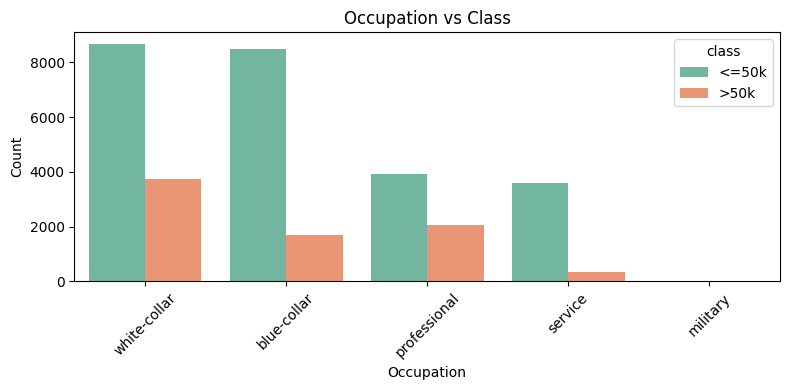


📊 CROSSTAB: Relationship vs Class
class           <=50k  >50k
relationship               
husband          55.1  44.9
not-in-family    89.7  10.3
other-relative   96.2   3.8
own-child        98.7   1.3
unmarried        93.7   6.3
wife             52.5  47.5


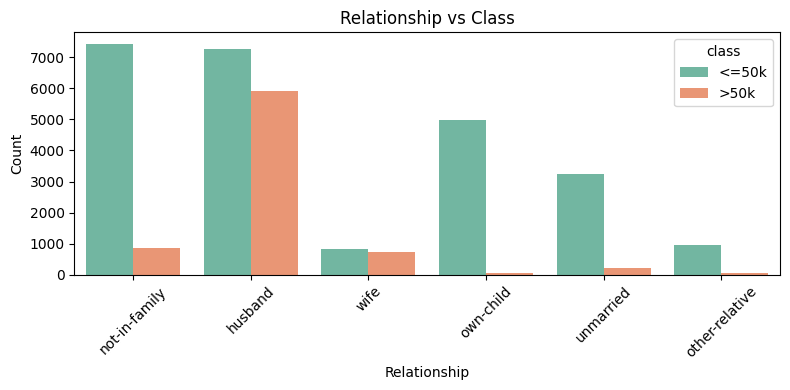


📊 CROSSTAB: Race vs Class
class               <=50k  >50k
race                           
amer-indian-eskimo   88.4  11.6
asian-pac-islander   73.4  26.6
black                87.6  12.4
other                90.8   9.2
white                74.4  25.6


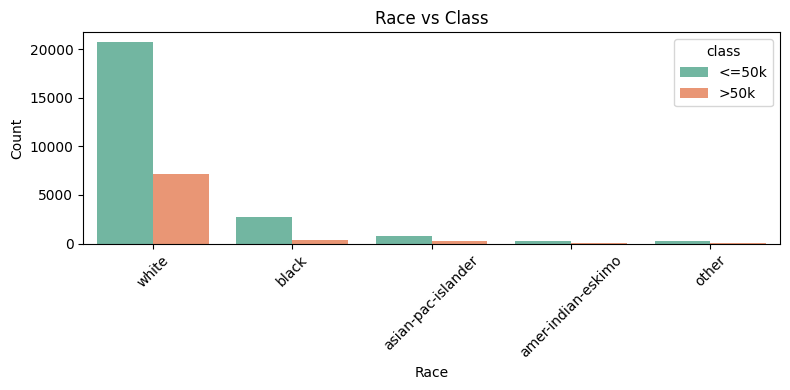


📊 CROSSTAB: Gender vs Class
class   <=50k  >50k
gender             
female   89.0  11.0
male     69.4  30.6


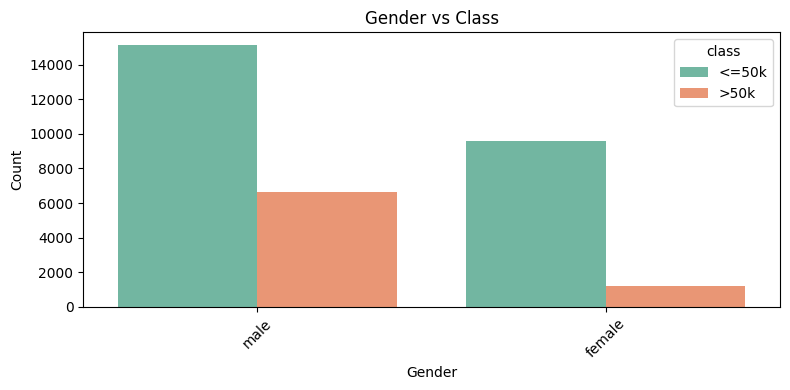


📊 CROSSTAB: Native-Country vs Class
class           <=50k  >50k
native-country             
other            81.3  18.7
united-states    75.4  24.6


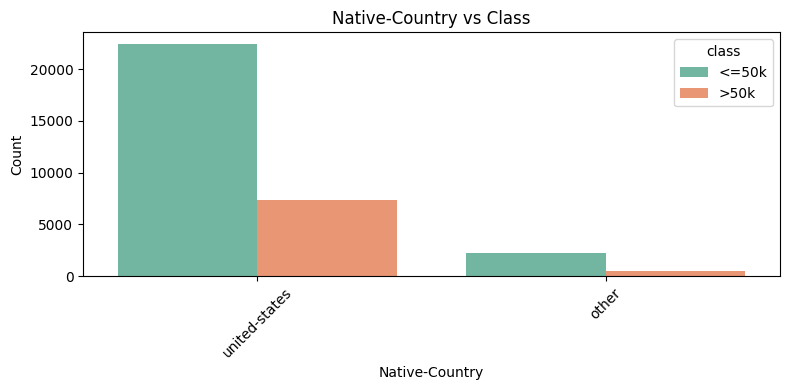


📊 CROSSTAB: Class vs Class
class  <=50k   >50k
class              
<=50k  100.0    0.0
>50k     0.0  100.0


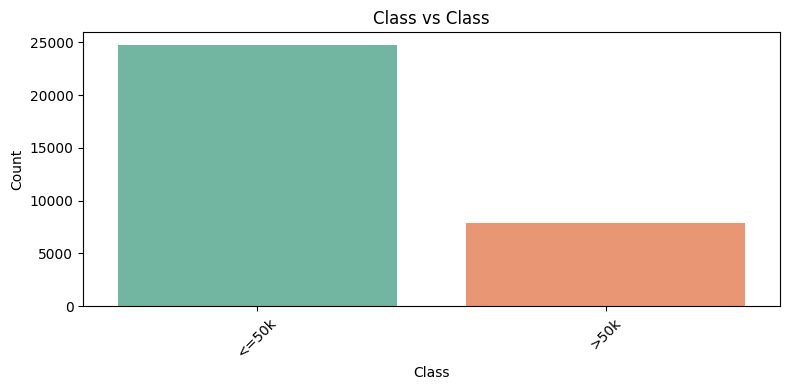

In [ ]:
for feature in categorical_columns:
    print(f"\n📊 CROSSTAB: {feature.title()} vs Class")
    print(pd.crosstab(df[feature], df['class'], normalize='index').round(3) * 100)

    # Plot
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='class', data=df, palette='Set2')
    plt.title(f'{feature.title()} vs Class')
    plt.xticks(rotation=45)
    plt.xlabel(feature.title())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.301370,government,0.180112,0.800000,unmarried,white-collar,not-in-family,white,male,0.999971,0.0,0.397959,united-states,<=50k
1,0.452055,self-employed,0.190386,0.800000,married,white-collar,husband,white,male,0.000000,0.0,0.122449,united-states,<=50k
2,0.287671,private,0.359467,0.533333,unmarried,blue-collar,not-in-family,white,male,0.000000,0.0,0.397959,united-states,<=50k
3,0.493151,private,0.378069,0.400000,married,blue-collar,husband,black,male,0.000000,0.0,0.397959,united-states,<=50k
4,0.150685,private,0.466403,0.800000,married,professional,wife,black,female,0.000000,0.0,0.397959,other,<=50k


In [ ]:
# Exclude education and the target ('income') from one-hot encoding
nominal_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [ ]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_private,workclass_self-employed,workclass_unemployed/other,...,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,race_asian-pac-islander,race_black,race_other,race_white,gender_male,native-country_united-states
0,0.301370,0.180112,0.800000,0.999971,0.0,0.397959,<=50k,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,0.452055,0.190386,0.800000,0.000000,0.0,0.122449,<=50k,False,True,False,...,False,False,False,False,False,False,False,True,True,True
2,0.287671,0.359467,0.533333,0.000000,0.0,0.397959,<=50k,True,False,False,...,False,False,False,False,False,False,False,True,True,True
3,0.493151,0.378069,0.400000,0.000000,0.0,0.397959,<=50k,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.150685,0.466403,0.800000,0.000000,0.0,0.397959,<=50k,True,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
# le = LabelEncoder()
# df['workclass'] = le.fit_transform(df['workclass'])
# df['occupation'] = le.fit_transform(df['occupation'])
# df['marital-status'] = le.fit_transform(df['marital-status'])
# df['relationship'] = le.fit_transform(df['relationship'])
# df['race'] = le.fit_transform(df['race'])
# df['gender'] = le.fit_transform(df['gender'])
# df['native-country'] = le.fit_transform(df['native-country'])

In [ ]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_private,workclass_self-employed,workclass_unemployed/other,...,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,race_asian-pac-islander,race_black,race_other,race_white,gender_male,native-country_united-states
0,0.301370,0.180112,0.800000,0.999971,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,0.452055,0.190386,0.800000,0.000000,0.0,0.122449,0,False,True,False,...,False,False,False,False,False,False,False,True,True,True
2,0.287671,0.359467,0.533333,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,True,True,True
3,0.493151,0.378069,0.400000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.150685,0.466403,0.800000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [ ]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_private,workclass_self-employed,workclass_unemployed/other,...,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,race_asian-pac-islander,race_black,race_other,race_white,gender_male,native-country_united-states
0,0.301370,0.180112,0.800000,0.999971,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,0.452055,0.190386,0.800000,0.000000,0.0,0.122449,0,False,True,False,...,False,False,False,False,False,False,False,True,True,True
2,0.287671,0.359467,0.533333,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,True,True,True
3,0.493151,0.378069,0.400000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.150685,0.466403,0.800000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,True,False,True,False,False,False,False


C:\Users\pc\AppData\Local\Temp\ipykernel_11216\2628875566.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


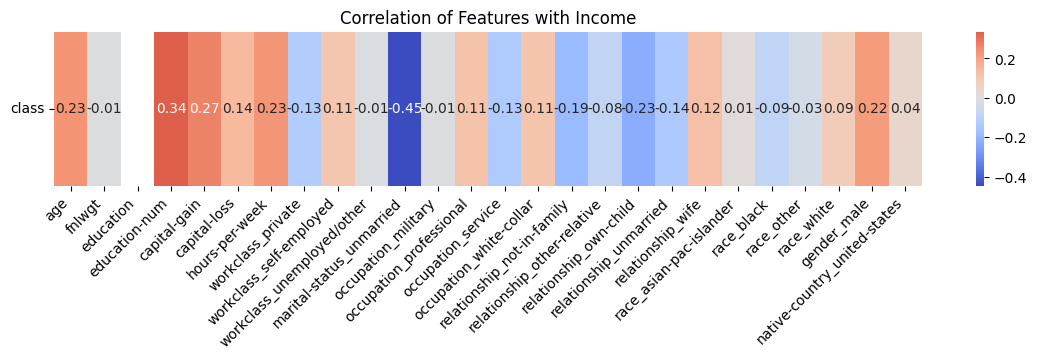

In [ ]:
target_corr = df.corr()['class'].drop('class')  # exclude self-correlation
target_corr_df = target_corr.to_frame().T  # Transpose for a horizontal heatmap

# Plot the heatmap
plt.figure(figsize=(14, 2))  # Wider, flatter figure
sns.heatmap(target_corr_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation of Features with Income')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_private,workclass_self-employed,workclass_unemployed/other,...,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,race_asian-pac-islander,race_black,race_other,race_white,gender_male,native-country_united-states
0,0.301370,0.180112,0.800000,0.999971,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,0.452055,0.190386,0.800000,0.000000,0.0,0.122449,0,False,True,False,...,False,False,False,False,False,False,False,True,True,True
2,0.287671,0.359467,0.533333,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,True,True,True
3,0.493151,0.378069,0.400000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.150685,0.466403,0.800000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_private,workclass_self-employed,workclass_unemployed/other,...,relationship_other-relative,relationship_own-child,relationship_unmarried,relationship_wife,race_asian-pac-islander,race_black,race_other,race_white,gender_male,native-country_united-states
0,0.301370,0.180112,0.800000,0.999971,0.0,0.397959,0,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,0.452055,0.190386,0.800000,0.000000,0.0,0.122449,0,False,True,False,...,False,False,False,False,False,False,False,True,True,True
2,0.287671,0.359467,0.533333,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,False,False,True,True,True
3,0.493151,0.378069,0.400000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.150685,0.466403,0.800000,0.000000,0.0,0.397959,0,True,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
print(1)

1
